In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'ex2data1.txt'

In [3]:
data = pd.read_csv(filename, names=['Exam1', 'Exam2', 'Admitted'])

In [4]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,u'Exam2 Score')

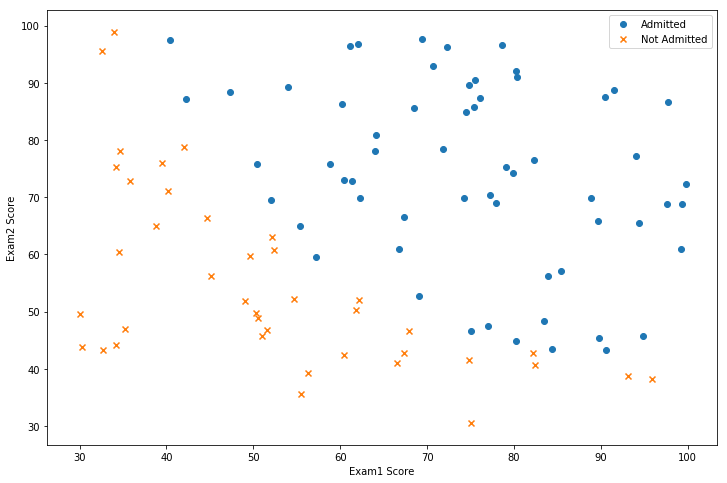

In [6]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

#For creating 1200 X 800 pixels
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], marker='x', label='Not Admitted')
#Used to show objects at right top corner 
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')


In [8]:
def sigmoid(z):
    g =  1 / (1 + np.exp(-z))
    return g

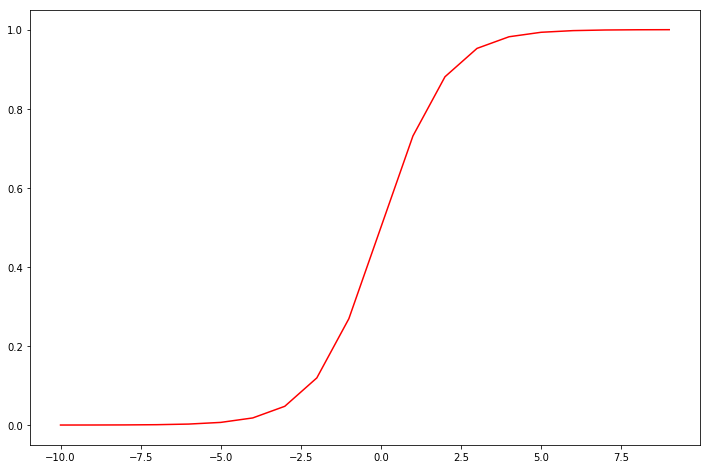

In [53]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [50]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X  = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y) ,np.log(1 - sigmoid(X * theta.T)))
    return (np.sum(first-second))/(len(X))

In [ ]:
data.insert(0, 'Ones', 1)

In [51]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

#convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [43]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [44]:
cost(theta, X, y)

0.6931471805599453

In [45]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [46]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y) 

0.20349770158947458

In [36]:
X.shape, y.shape

((100, 3), (100, 1))

In [38]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [47]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return[1 if x>= 0.5 else 0 for x in probability]

In [48]:
theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89%
